In [1]:
from eda_import import *

In [2]:
TARGET_GENES = pd.read_csv('./reference_data/target_genes_with_type.tsv', sep='\t').Gene.values.tolist()

In [3]:
assert len(TARGET_GENES) == 114

In [4]:
%%time
adf = pd.read_csv('reference_data/cosmic/CosmicMutantExport.tsv.gz',
                  compression='gzip', sep='\t')

CPU times: user 37 s, sys: 2.61 s, total: 39.6 s
Wall time: 39.6 s


In [5]:
bdf = adf.rename(columns=dict(
    zip(adf.columns.values, 
        map(lambda v: '_'.join(v.lower().split()), adf.columns.values))))

In [6]:
assert bdf.shape == (4658693, 35)

In [7]:
assert bdf.gene_name.unique().shape[0] == 28950

In [8]:
bdf.head(2)

,gene_name,accession_number,gene_cds_length,hgnc_id,sample_name,id_sample,id_tumour,primary_site,site_subtype_1,site_subtype_2,site_subtype_3,primary_histology,histology_subtype_1,histology_subtype_2,histology_subtype_3,genome-wide_screen,mutation_id,mutation_cds,mutation_aa,mutation_description,mutation_zygosity,loh,grch,mutation_genome_position,mutation_strand,snp,resistance_mutation,fathmm_prediction,fathmm_score,mutation_somatic_status,pubmed_pmid,id_study,sample_source,tumour_origin,age
0,PTEN,ENST00000371953,1212,9588.0,WA24,1689670,1597947,prostate,NS,NS,NS,carcinoma,adenocarcinoma,NS,NS,y,COSM4958,c.955_958delACTT,p.T319fs*1,Deletion - Frameshift,NaN,u,38.0,10:87961047-87961050,+,NaN,-,NaN,NaN,Confirmed somatic variant,22722839.0,NaN,autopsy - NOS,metastasis,76.0
1,NOTCH1,ENST00000277541,7668,7881.0,HN208PT,1542923,1465226,upper_aerodigestive_tract,mouth,NS,NS,carcinoma,squamous_cell_carcinoma,NS,NS,n,COSM99653,c.3835C>T,p.R1279C,Substitution - Missense,NaN,u,38.0,9:136506782-136506782,-,n,-,PATHOGENIC,0.99741,Confirmed somatic variant,21798897.0,NaN,NS,NS,NaN


In [9]:
bdf.columns

Index(['gene_name', 'accession_number', 'gene_cds_length', 'hgnc_id', 'sample_name', 'id_sample', 'id_tumour', 'primary_site', 'site_subtype_1', 'site_subtype_2', 'site_subtype_3', 'primary_histology', 'histology_subtype_1', 'histology_subtype_2', 'histology_subtype_3', 'genome-wide_screen',
       'mutation_id', 'mutation_cds', 'mutation_aa', 'mutation_description', 'mutation_zygosity', 'loh', 'grch', 'mutation_genome_position', 'mutation_strand', 'snp', 'resistance_mutation', 'fathmm_prediction', 'fathmm_score', 'mutation_somatic_status', 'pubmed_pmid', 'id_study', 'sample_source',
       'tumour_origin', 'age'],
      dtype='object')

In [10]:
histology_df = bdf[['primary_site', 'site_subtype_1', 'site_subtype_2', 'site_subtype_3',
                    'primary_histology', 'histology_subtype_1', 
                    'histology_subtype_2', 'histology_subtype_3']].drop_duplicates()

In [11]:
histology_df.shape

(3161, 8)

In [12]:
histology_df.head()

,primary_site,site_subtype_1,site_subtype_2,site_subtype_3,primary_histology,histology_subtype_1,histology_subtype_2,histology_subtype_3
0,prostate,NS,NS,NS,carcinoma,adenocarcinoma,NS,NS
1,upper_aerodigestive_tract,mouth,NS,NS,carcinoma,squamous_cell_carcinoma,NS,NS
2,stomach,NS,NS,NS,carcinoma,adenocarcinoma,NS,NS
3,oesophagus,NS,NS,NS,carcinoma,adenocarcinoma,NS,NS
4,pancreas,NS,NS,NS,carcinoma,ductal_carcinoma,NS,NS


In [13]:
bdf.site_subtype_3.value_counts()

NS           4658636
ethmoid      27     
maxillary    25     
piriform     5      
Name: site_subtype_3, dtype: int64

In [14]:
bdf.site_subtype_3.value_counts()

NS           4658636
ethmoid      27     
maxillary    25     
piriform     5      
Name: site_subtype_3, dtype: int64

In [16]:
cdf = bdf.query('gene_name in {0}'.format(TARGET_GENES)).copy()

In [17]:
assert cdf.shape == (304677, 35)

In [18]:
assert cdf.gene_name.unique().shape[0] == 114

In [19]:
assert bdf.sample_name.unique().shape[0] == 318823

In [20]:
assert cdf.sample_name.unique().shape[0] == 238213

In [21]:
assert cdf[-cdf.fathmm_score.isnull()].shape[0] == 173043

In [22]:
assert cdf.query('fathmm_score != fathmm_score').shape == (131634, 35)

In [23]:
131634 / 304677

0.4320444273771896

In [24]:
cdf.fathmm_prediction.value_counts()

PATHOGENIC    160149
NEUTRAL       10477 
Name: fathmm_prediction, dtype: int64

In [25]:
cdf.mutation_description.value_counts()

Substitution - Missense            204540
Unknown                            28089 
Insertion - In frame               15404 
Deletion - In frame                15201 
Substitution - Nonsense            12616 
Deletion - Frameshift              9919  
Substitution - coding silent       8445  
Insertion - Frameshift             4867  
Whole gene deletion                2120  
Complex - deletion inframe         1943  
Frameshift                         549   
Complex - frameshift               491   
Complex - insertion inframe        318   
Complex - compound substitution    106   
Nonstop extension                  43    
Complex                            26    
Name: mutation_description, dtype: int64

In [26]:
cdf[-cdf.fathmm_score.isnull()].mutation_description.value_counts()

Substitution - Missense         150983
Substitution - Nonsense         11035 
Substitution - coding silent    7719  
Unknown                         3248  
Nonstop extension               36    
Insertion - In frame            9     
Deletion - Frameshift           9     
Deletion - In frame             3     
Complex - insertion inframe     1     
Name: mutation_description, dtype: int64

In [27]:
ddf = cdf[['gene_name', 'mutation_id', 'mutation_cds', 'mutation_aa',
           'mutation_description', 'fathmm_prediction', 'fathmm_score']].drop_duplicates()

In [28]:
assert ddf.shape == (54193, 7)

In [29]:
cdf.head(1)

,gene_name,accession_number,gene_cds_length,hgnc_id,sample_name,id_sample,id_tumour,primary_site,site_subtype_1,site_subtype_2,site_subtype_3,primary_histology,histology_subtype_1,histology_subtype_2,histology_subtype_3,genome-wide_screen,mutation_id,mutation_cds,mutation_aa,mutation_description,mutation_zygosity,loh,grch,mutation_genome_position,mutation_strand,snp,resistance_mutation,fathmm_prediction,fathmm_score,mutation_somatic_status,pubmed_pmid,id_study,sample_source,tumour_origin,age
0,PTEN,ENST00000371953,1212,9588.0,WA24,1689670,1597947,prostate,NS,NS,NS,carcinoma,adenocarcinoma,NS,NS,y,COSM4958,c.955_958delACTT,p.T319fs*1,Deletion - Frameshift,NaN,u,38.0,10:87961047-87961050,+,NaN,-,NaN,NaN,Confirmed somatic variant,22722839.0,NaN,autopsy - NOS,metastasis,76.0


In [30]:
ddf.head()

,gene_name,mutation_id,mutation_cds,mutation_aa,mutation_description,fathmm_prediction,fathmm_score
0,PTEN,COSM4958,c.955_958delACTT,p.T319fs*1,Deletion - Frameshift,NaN,NaN
1,NOTCH1,COSM99653,c.3835C>T,p.R1279C,Substitution - Missense,PATHOGENIC,0.99741
7,NOTCH1,COSM29456,c.7555delC,p.Q2519fs*>37,Deletion - Frameshift,NaN,NaN
9,APC,COSM18779,c.4067C>G,p.S1356*,Substitution - Nonsense,PATHOGENIC,0.96807
10,TP53,COSM10672,c.577C>T,p.H193Y,Substitution - Missense,PATHOGENIC,0.99615


In [31]:
edf = ddf.dropna().query('fathmm_prediction == "PATHOGENIC"')

In [32]:
assert edf.shape == (23628, 7)

In [33]:
edf.mutation_description.value_counts()

Substitution - Missense         17150
Substitution - Nonsense         2891 
Substitution - coding silent    2282 
Unknown                         1270 
Nonstop extension               27   
Deletion - Frameshift           4    
Deletion - In frame             2    
Insertion - In frame            1    
Complex - insertion inframe     1    
Name: mutation_description, dtype: int64

In [34]:
edf.groupby('gene_name').apply(lambda g: g.shape[0]).sort_values().head()

gene_name
NFE2L3    1 
MYCL      11
DRAM1     14
CHURC1    14
TXNL4A    15
dtype: int64

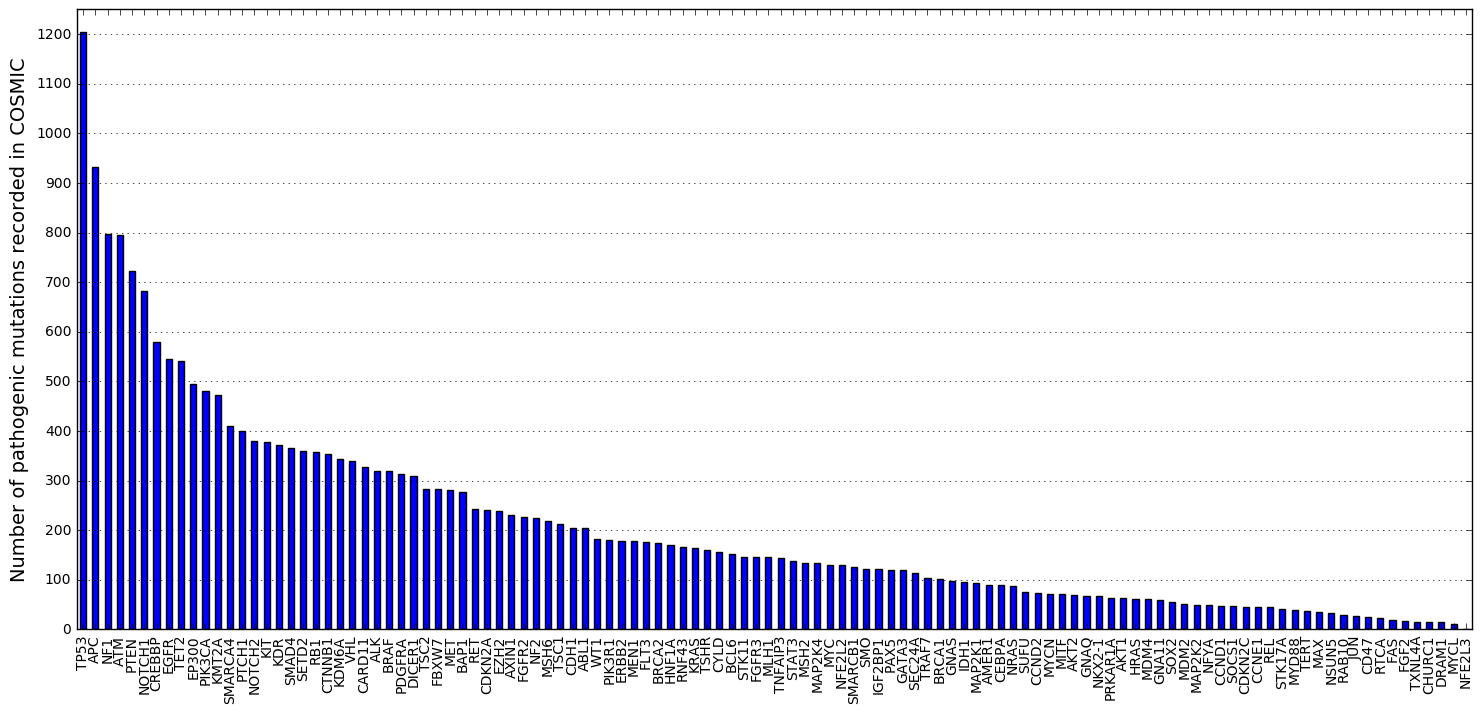

In [35]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111)

edf.groupby('gene_name').apply(
    lambda g: g.shape[0]).sort_values(ascending=False).plot.bar(ax=ax)
ax.set_yticks(np.arange(0, 1250, 100))
ax.set_ylim(0, 1250)
ax.yaxis.grid()
ax.set_ylabel('Number of pathogenic mutations recorded in COSMIC', fontsize=14)
ax.set_xlabel('')
# plt.savefig('./results/figs/num-pathogenic-mutations.jpg', dpi=300, bbox_inches='tight')